In [94]:
"""My research project is to investigate the density profiles of MW and M31 during the galactic merger event. Specifically I will be analyzing the 
surface density profiles of the two galaxies before and during the merger. This will mean I will calculate the surface densities of MW and M31 at various
snapshots during the merger, but will not investigate the merger remnant. The specific goal for this code is to try to generate a sersic profile for the
disk of a galaxy. Here, I will use MW as the galaxy and use the disk particles at snapshot 000. This will give us the initial sersic profile of the disk
of MW. In class, we learned how to use the sersic profile for the bulge of a galaxy, but the disk component should differ slightly."""

'My research project is to investigate the density profiles of MW and M31 during the galactic merger event. Specifically I will be analyzing the \nsurface density profiles of the two galaxies before and during the merger. This will mean I will calculate the surface densities of MW and M31 at various\nsnapshots during the merger, but will not investigate the merger remnant. The specific goal for this code is to try to generate a sersic profile for the\ndisk of a galaxy. Here, I will use MW as the galaxy and use the disk particles at snapshot 000. This will give us the initial sersic profile of the disk\nof MW. In class, we learned how to use the sersic profile for the bulge of a galaxy, but the disk component should differ slightly.'

In [1]:
# Load Modules
import numpy as np
import astropy.units as u
from scipy.optimize import curve_fit

# Import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# My modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

In [11]:
# Start with code from Lab 6
# Change to calculating values for the disk of MW and M31
# Adjust Sersic profile funtion

In [167]:
# Create a centre of mass object for MW
# Disk particles (ptype=2)
MW_COM = CenterOfMass("MW_000.txt",2)

In [169]:
# Create a centre of mass object for M31
# Disk particles (ptype=2)
M31_COM = CenterOfMass("M31_000.txt",2)

In [171]:
# Centre of mass of MW
MW_COM_P = MW_COM.COM_P(0.1)

In [173]:
# Centre of mass of M31
M31_COM_P = M31_COM.COM_P(0.1)

In [175]:
# Store the x, y, z, positions and mass of the disk particles
# Correct for the COM position of MW
MWx = MW_COM.x-MW_COM_P[0].value
MWy = MW_COM.y-MW_COM_P[1].value
MWz = MW_COM.z-MW_COM_P[2].value
MWm = MW_COM.m #units of 1e10

In [177]:
# Store the x, y, z, positions and mass of the disk particles
# Correct for the COM position of M31
M31x = M31_COM.x-M31_COM_P[0].value
M31y = M31_COM.y-M31_COM_P[1].value
M31z = M31_COM.z-M31_COM_P[2].value
M31m = M31_COM.m #units of 1e10

In [179]:
# Determine the positions of the disk particles in cylindrical coordinates for MW
MWcyl_r = np.sqrt(MWx**2+MWy**2) #radial
MWcyl_theta = np.arctan(MWy,MWx) #theta

In [181]:
# Determine the positions of the disk particles in cylindrical coordinates for MW
M31cyl_r = np.sqrt(M31x**2+M31y**2) #radial
M31cyl_theta = np.arctan(M31y,M31x) #theta

In [183]:
def SurfaceDensity(r,m):
    """ Function that computes the surface mass density profile
    given an array of particle masses and radii 
     
    PARMETERS
    ---------
        r : array of `floats` - cyclindrical radius [kpc]
        m : array of `floats` - particle masses [1e10 Msun] 
    
    RETURNS
    -------
        r_annuli : array of `floats` -  radial bins for the 
            annuli that correspond to the surface mass density profile
    
        sigma: array of `floats` - surface mass density profile 
         [1e10 Msun/kpc^2] 
        
        
    """
    
    # Create an array of radii that captures the extent of the disk
    # 95% of max range of disk
    radii = np.arange(0.1,0.95*r.max(),0.1)

    # Create a mask to select particles within each radius
    # Returns a boolean 
    enc_mask = r[:,np.newaxis]<radii

    # Calculate mass of bulge particles within each annulus.  
    # Relevant particles will be selected by enc_mask (i.e., *1)
    # axis=0 flattens to 1D
    m_enc = np.sum(m[:,np.newaxis]*enc_mask, axis=0)

    # Use the difference between m_enc at adjacent radii to get mass in each annulus
    m_annuli = np.diff(m_enc) # one element less then m_enc
    
    # Surface mass density of stars in the annulus
    # Mass in annulus / surface area of the annulus. 
    sigma = m_annuli/(np.pi*(radii[1:]**2-radii[:-1]**2)) #units 1e10
    # array starts at 0, but here starting at 1 and
    # subtracting radius that ends one index earlier.
    
    # Define the range of annuli
    # Geometric mean between adjacent radii
    r_annuli = np.sqrt(radii[1:]*radii[:-1]) 

    return r_annuli, sigma

In [185]:
# Define the surface mass density profile for the simulated MW disk and the corresponding annuli
MWr_annuli, MWsigmadisk = SurfaceDensity(MWcyl_r,MWm)

In [187]:
# Define the surface mass density profile for the simulated MW disk and the corresponding annuli
M31r_annuli, M31sigmadisk = SurfaceDensity(M31cyl_r,M31m)

In [189]:
# Create a mass profile object for MW
MWmass = MassProfile("MW",0)

In [191]:
# Create a mass profile object for M31
M31mass = MassProfile("M31",0)

In [192]:
# Determine the disk mass profile for MW
# Use the annuli defined for the surface mass density profile
MWdisk_mass = MWmass.massEnclosed(2,MWr_annuli).value

In [195]:
# Determine the disk mass profile for M31
# Use the annuli defined for the surface mass density profile
M31disk_mass = M31mass.massEnclosed(2,M31r_annuli).value

In [197]:
# Determine the total mass of the MW disk
MWdisk_total = ComponentMass("MW_000.txt",2)*1e12

In [199]:
# Determine the total mass of the M31 disk
M31disk_total = ComponentMass("M31_000.txt",2)*1e12

In [201]:
# Find the effective radius of the MW disk
# Re encloses half of the total disk mass
# Half the total disk mass
MWd_half = MWdisk_total/2

In [203]:
# Find the effective radius of the M31 disk
M31d_half = M31disk_total/2

In [205]:
# Find the indices where the MW disk mass is larger than d_half
MWindex = np.where(MWdisk_mass>MWd_half)

In [207]:
# Find the indices where the M31 disk mass is larger than d_half
M31index = np.where(M31disk_mass>M31d_half)

In [209]:
# Define the Effective radius of the MW disk
MWre_disk = MWr_annuli[MWindex][0]*3/4

In [211]:
# Define the Effective radius of the M31 disk
M31re_disk = M31r_annuli[M31index][0]*3/4

In [213]:
def sersicD(r, re, n, mtot, rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        re: `float`
            The Effective radius (2D radius that contains 
            half the light) (kpc)
        n:  `float`
            sersic index
        mtot: `float`
            the total stellar mass (Msun)

    RETURNS
    -------
        I: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """

    # Claculate the luminostiy using mass-to-light ratio
    lum = mtot/rat
    
    Ie = lum/7.2/np.pi/re**2

    # Break down Sersic profile
    a = (r/re)**(1/n)
    b = -(2*n-1/3)*(a-1)

    # Surface brightness or mass density profiles
    I=Ie*np.exp(b)
    
    return I

In [215]:
def MWSersicFunc(r,n,rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        n:  `float`
            sersic index

    RETURNS
    -------
        func: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """
    re = MWre_disk
    mtot = MWdisk_total
    return ((mtot/rat)/(1e10*7.2*np.pi*re**2))*np.exp(-(2*n-1/3)*((r/re)**(1/n)-1))

In [217]:
MWpopt, MWpcov = curve_fit(MWSersicFunc,MWr_annuli,MWsigmadisk,bounds=([0,1.0],[9.0,1.5]))
print(MWpopt)

[2.77401778 1.        ]


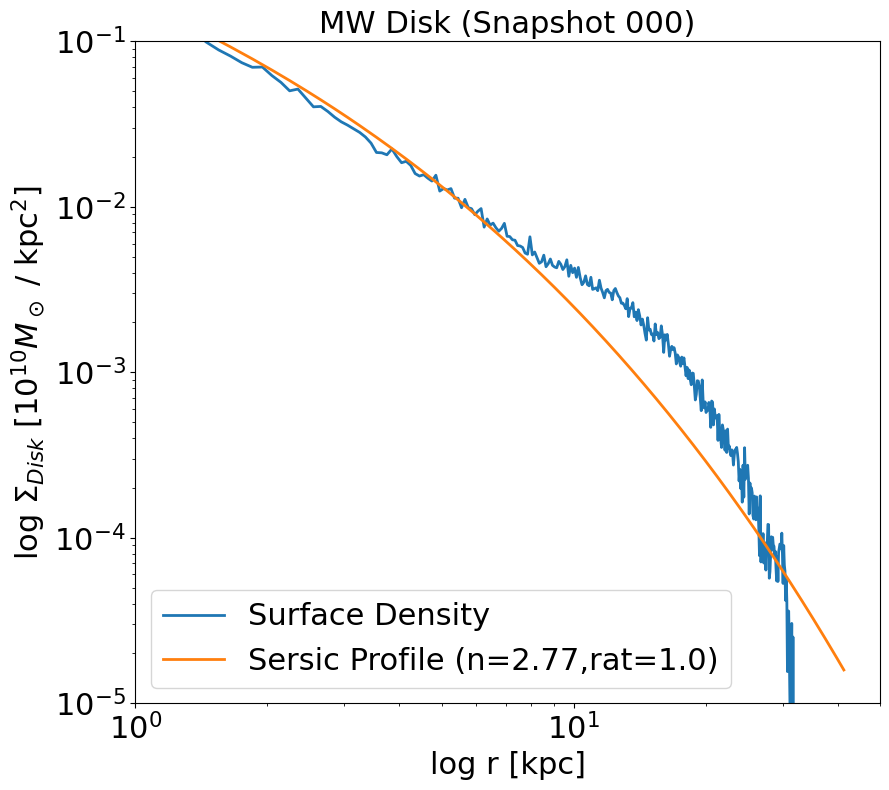

In [219]:
fig, ax = plt.subplots(figsize=(9,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Surface Density Profile
ax.loglog(MWr_annuli,MWsigmadisk,lw=2,label="Surface Density")


# Sersic fit to the surface brightness
ax.loglog(MWr_annuli,MWSersicFunc(MWr_annuli,*MWpopt),lw=2,label="Sersic Profile (n=2.77,rat=1.0)")


plt.xlabel('log r [kpc]', fontsize=22)

# note the y axis units
plt.ylabel(r'log $\Sigma_{Disk}$ [$10^{10} M_\odot$ / kpc$^2$]', 
          fontsize=22)

plt.title('MW Disk (Snapshot 000)', fontsize=22)

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-5,0.1)

ax.legend(loc='best', fontsize=22)
fig.tight_layout()
plt.savefig('SersicMW_000')

In [221]:
def M31SersicFunc(r,n,rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        n:  `float`
            sersic index
        rat: 'float'
            mass to light ratio

    RETURNS
    -------
        func: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """
    re = M31re_disk
    mtot = M31disk_total
    return ((mtot/rat)/(1e10*7.2*np.pi*re**2))*np.exp(-(2*n-1/3)*((r/re)**(1/n)-1))

In [223]:
M31popt, M31pcov = curve_fit(M31SersicFunc,M31r_annuli,M31sigmadisk,bounds=([0,0.9],[9.0,1.0]))
print(M31popt)

[2.52841583 0.9       ]


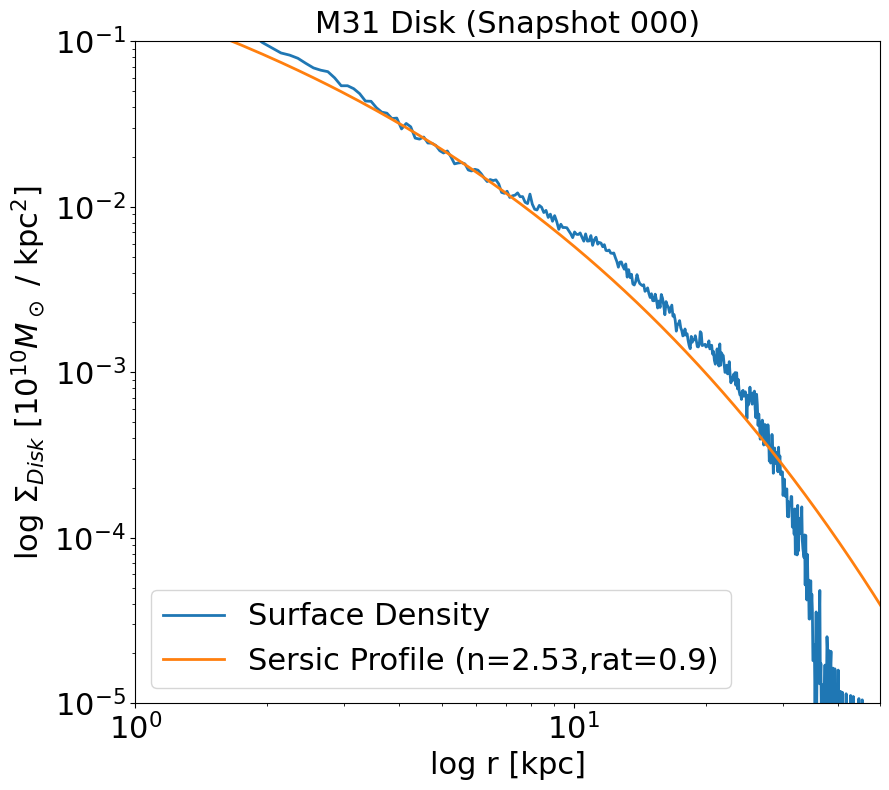

In [225]:
fig, ax = plt.subplots(figsize=(9,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Surface Density Profile
ax.loglog(M31r_annuli,M31sigmadisk,lw=2,label="Surface Density")


# Sersic fit to the surface brightness
ax.loglog(M31r_annuli,M31SersicFunc(M31r_annuli,*M31popt),lw=2,label="Sersic Profile (n=2.53,rat=0.9)")


plt.xlabel('log r [kpc]', fontsize=22)

# note the y axis units
plt.ylabel(r'log $\Sigma_{Disk}$ [$10^{10} M_\odot$ / kpc$^2$]', 
          fontsize=22)

plt.title('M31 Disk (Snapshot 000)', fontsize=22)

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-5,0.1)

ax.legend(loc='best', fontsize=22)
fig.tight_layout()
plt.savefig('SersicM31_000')

In [13]:
# Create a centre of mass object for MW
# Disk particles (ptype=2)
MW_COM_280 = CenterOfMass("MW_280.txt",2)

In [101]:
# Create a centre of mass object for MW
# Disk particles (ptype=2)
MW_COM_385 = CenterOfMass("MW_385.txt",2)

In [14]:
# Create a centre of mass object for M31
# Disk particles (ptype=2)
M31_COM_280 = CenterOfMass("M31_280.txt",2)

In [103]:
# Create a centre of mass object for M31
# Disk particles (ptype=2)
M31_COM_385 = CenterOfMass("M31_385.txt",2)

In [19]:
# Centre of mass of MW
MW_COM_P_280 = MW_COM_280.COM_P(0.1)

In [105]:
# Centre of mass of MW
MW_COM_P_385 = MW_COM_385.COM_P(0.1)

In [21]:
# Centre of mass of M31
M31_COM_P_280 = M31_COM_280.COM_P(0.1)

In [107]:
# Centre of mass of M31
M31_COM_P_385 = M31_COM_385.COM_P(0.1)

In [23]:
# Store the x, y, z, positions and mass of the disk particles
# Correct for the COM position of MW
MWx280 = MW_COM_280.x-MW_COM_P_280[0].value
MWy280 = MW_COM_280.y-MW_COM_P_280[1].value
MWz280 = MW_COM_280.z-MW_COM_P_280[2].value
MWm280 = MW_COM_280.m #units of 1e10

In [109]:
# Store the x, y, z, positions and mass of the disk particles
# Correct for the COM position of MW
MWx385 = MW_COM_385.x-MW_COM_P_385[0].value
MWy385 = MW_COM_385.y-MW_COM_P_385[1].value
MWz385 = MW_COM_385.z-MW_COM_P_385[2].value
MWm385 = MW_COM_385.m #units of 1e10

In [25]:
# Store the x, y, z, positions and mass of the disk particles
# Correct for the COM position of M31
M31x280 = M31_COM_280.x-M31_COM_P_280[0].value
M31y280 = M31_COM_280.y-M31_COM_P_280[1].value
M31z280 = M31_COM_280.z-M31_COM_P_280[2].value
M31m280 = M31_COM_280.m #units of 1e10

In [111]:
# Store the x, y, z, positions and mass of the disk particles
# Correct for the COM position of M31
M31x385 = M31_COM_385.x-M31_COM_P_385[0].value
M31y385 = M31_COM_385.y-M31_COM_P_385[1].value
M31z385 = M31_COM_385.z-M31_COM_P_385[2].value
M31m385 = M31_COM_385.m #units of 1e10

In [29]:
# Determine the positions of the disk particles in cylindrical coordinates for MW
MWcyl_r280 = np.sqrt(MWx280**2+MWy280**2) #radial
MWcyl_theta280 = np.arctan(MWy280,MWx280) #theta

In [113]:
# Determine the positions of the disk particles in cylindrical coordinates for MW
MWcyl_r385 = np.sqrt(MWx385**2+MWy385**2) #radial
MWcyl_theta385 = np.arctan(MWy385,MWx385) #theta

In [31]:
# Determine the positions of the disk particles in cylindrical coordinates for MW
M31cyl_r280 = np.sqrt(M31x280**2+M31y280**2) #radial
M31cyl_theta280 = np.arctan(M31y280,M31x280) #theta

In [115]:
# Determine the positions of the disk particles in cylindrical coordinates for MW
M31cyl_r385 = np.sqrt(M31x385**2+M31y385**2) #radial
M31cyl_theta385 = np.arctan(M31y385,M31x385) #theta

In [35]:
# Define the surface mass density profile for the simulated MW disk and the corresponding annuli
MWr_annuli280, MWsigmadisk280 = SurfaceDensity(MWcyl_r280,MWm280)

In [117]:
# Define the surface mass density profile for the simulated MW disk and the corresponding annuli
MWr_annuli385, MWsigmadisk385 = SurfaceDensity(MWcyl_r385,MWm385)

In [37]:
# Define the surface mass density profile for the simulated MW disk and the corresponding annuli
M31r_annuli280, M31sigmadisk280 = SurfaceDensity(M31cyl_r280,M31m280)

In [119]:
# Define the surface mass density profile for the simulated MW disk and the corresponding annuli
M31r_annuli385, M31sigmadisk385 = SurfaceDensity(M31cyl_r385,M31m385)

In [41]:
# Create a mass profile object for MW
MWmass280 = MassProfile("MW",280)

In [121]:
# Create a mass profile object for MW
MWmass385 = MassProfile("MW",385)

In [43]:
# Create a mass profile object for M31
M31mass280 = MassProfile("M31",280)

In [123]:
# Create a mass profile object for M31
M31mass385 = MassProfile("M31",385)

In [45]:
# Determine the disk mass profile for MW
# Use the annuli defined for the surface mass density profile
MWdisk_mass280 = MWmass280.massEnclosed(2,MWr_annuli280).value

In [125]:
# Determine the disk mass profile for MW
# Use the annuli defined for the surface mass density profile
MWdisk_mass385 = MWmass385.massEnclosed(2,MWr_annuli385).value

In [47]:
# Determine the disk mass profile for M31
# Use the annuli defined for the surface mass density profile
M31disk_mass280 = M31mass280.massEnclosed(2,M31r_annuli280).value

In [127]:
# Determine the disk mass profile for M31
# Use the annuli defined for the surface mass density profile
M31disk_mass385 = M31mass385.massEnclosed(2,M31r_annuli385).value

In [49]:
# Determine the total mass of the MW disk
MWdisk_total280 = ComponentMass("MW_280.txt",2)*1e12

In [129]:
# Determine the total mass of the MW disk
MWdisk_total385 = ComponentMass("MW_385.txt",2)*1e12

In [51]:
# Determine the total mass of the M31 disk
M31disk_total280 = ComponentMass("M31_280.txt",2)*1e12

In [131]:
# Determine the total mass of the M31 disk
M31disk_total385 = ComponentMass("M31_385.txt",2)*1e12

In [53]:
# Find the effective radius of the MW disk
# Re encloses half of the total disk mass
# Half the total disk mass
MWd_half280 = MWdisk_total280/2

In [133]:
# Find the effective radius of the MW disk
# Re encloses half of the total disk mass
# Half the total disk mass
MWd_half385 = MWdisk_total385/2

In [55]:
# Find the effective radius of the M31 disk
M31d_half280 = M31disk_total280/2

In [135]:
# Find the effective radius of the M31 disk
M31d_half385 = M31disk_total385/2

In [57]:
# Find the indices where the MW disk mass is larger than d_half
MWindex280 = np.where(MWdisk_mass280>MWd_half280)

In [137]:
# Find the indices where the MW disk mass is larger than d_half
MWindex385 = np.where(MWdisk_mass385>MWd_half385)

In [59]:
# Find the indices where the M31 disk mass is larger than d_half
M31index280 = np.where(M31disk_mass280>M31d_half280)

In [139]:
# Find the indices where the M31 disk mass is larger than d_half
M31index385 = np.where(M31disk_mass385>M31d_half385)

In [61]:
# Define the Effective radius of the MW disk
MWre_disk280 = MWr_annuli280[MWindex280][0]*3/4

In [141]:
# Define the Effective radius of the MW disk
MWre_disk385 = MWr_annuli385[MWindex385][0]*3/4

In [63]:
# Define the Effective radius of the M31 disk
M31re_disk280 = M31r_annuli280[M31index280][0]*3/4

In [143]:
# Define the Effective radius of the M31 disk
M31re_disk385 = M31r_annuli385[M31index385][0]*3/4

In [69]:
def MWSersicFunc280(r,n,rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        n:  `float`
            sersic index

    RETURNS
    -------
        func: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """
    re = MWre_disk280
    mtot = MWdisk_total280
    return ((mtot/rat)/(1e10*7.2*np.pi*re**2))*np.exp(-(2*n-1/3)*((r/re)**(1/n)-1))

In [85]:
MWpopt280, MWpcov280 = curve_fit(MWSersicFunc280,MWr_annuli280,MWsigmadisk280,bounds=([0,1.0],[9.0,1.4]))
print(MWpopt280)

[2.3805071 1.       ]


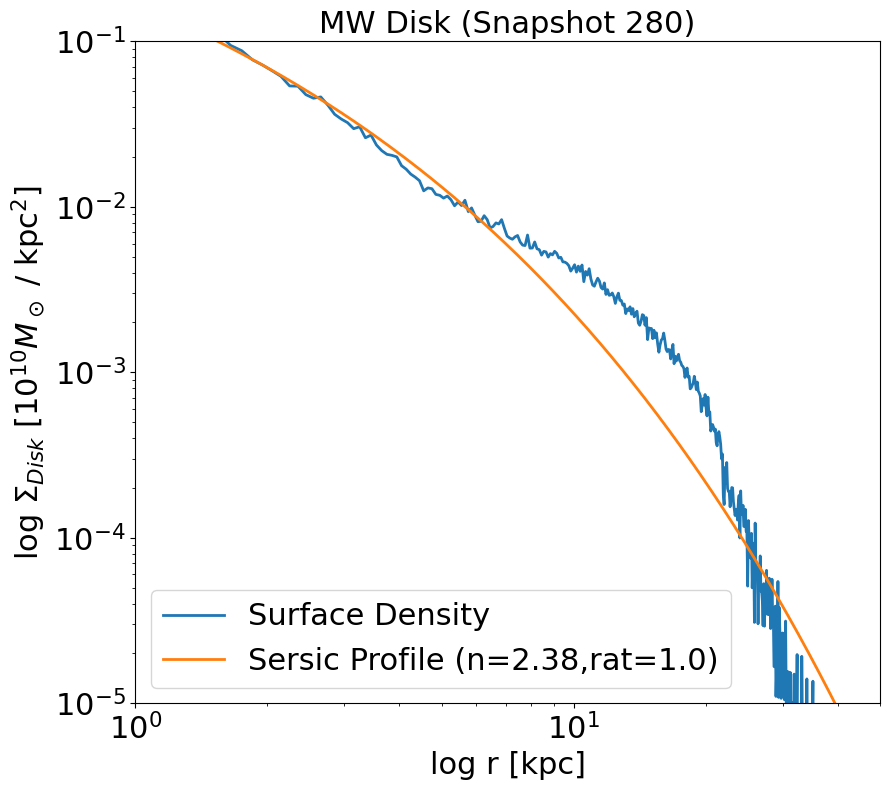

In [165]:
fig, ax = plt.subplots(figsize=(9,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Surface Density Profile
ax.loglog(MWr_annuli280,MWsigmadisk280,lw=2,label="Surface Density")


# Sersic fit to the surface brightness
ax.loglog(MWr_annuli280,MWSersicFunc280(MWr_annuli280,*MWpopt280),lw=2,label="Sersic Profile (n=2.38,rat=1.0)")


plt.xlabel('log r [kpc]', fontsize=22)

# note the y axis units
plt.ylabel(r'log $\Sigma_{Disk}$ [$10^{10} M_\odot$ / kpc$^2$]', 
          fontsize=22)

plt.title('MW Disk (Snapshot 280)', fontsize=22)

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-5,0.1)

ax.legend(loc='best', fontsize=22)
fig.tight_layout()
plt.savefig('SersicMW_280')

In [91]:
def M31SersicFunc280(r,n,rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        n:  `float`
            sersic index
        rat: 'float'
            mass to light ratio

    RETURNS
    -------
        func: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """
    re = M31re_disk280
    mtot = M31disk_total280
    return ((mtot/rat)/(1e10*7.2*np.pi*re**2))*np.exp(-(2*n-1/3)*((r/re)**(1/n)-1))

In [93]:
M31popt280, M31pcov280 = curve_fit(M31SersicFunc280,M31r_annuli280,M31sigmadisk280,bounds=([0,0.9],[9.0,1.0]))
print(M31popt280)

[2.73956383 0.9       ]


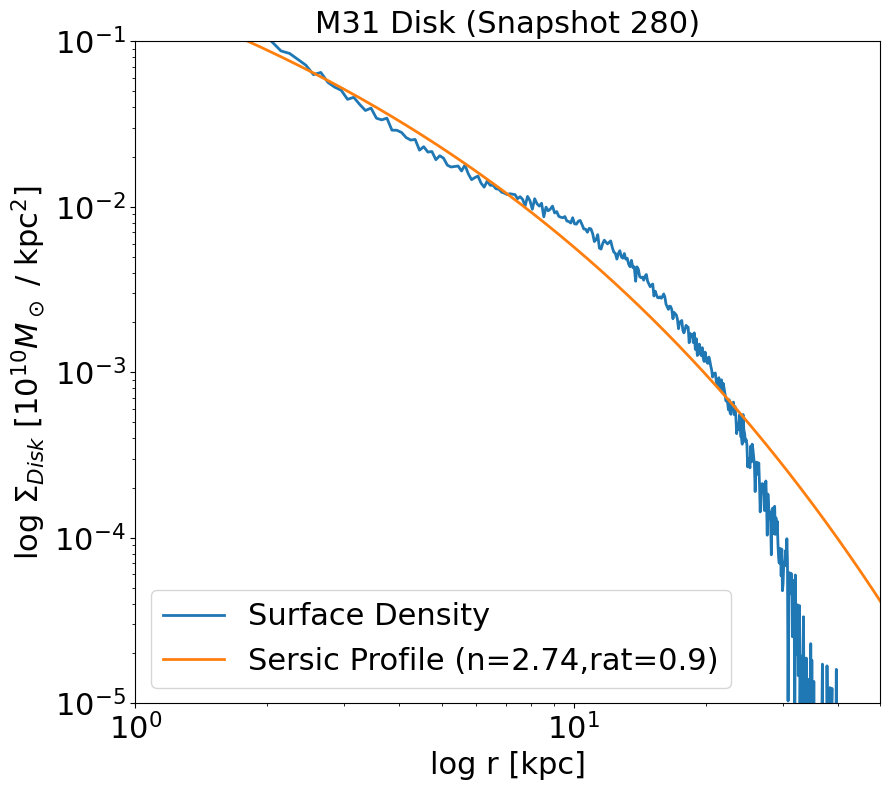

In [163]:
fig, ax = plt.subplots(figsize=(9,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Surface Density Profile
ax.loglog(M31r_annuli280,M31sigmadisk280,lw=2,label="Surface Density")


# Sersic fit to the surface brightness
ax.loglog(M31r_annuli280,M31SersicFunc280(M31r_annuli280,*M31popt280),lw=2,label="Sersic Profile (n=2.74,rat=0.9)")


plt.xlabel('log r [kpc]', fontsize=22)

# note the y axis units
plt.ylabel(r'log $\Sigma_{Disk}$ [$10^{10} M_\odot$ / kpc$^2$]', 
          fontsize=22)

plt.title('M31 Disk (Snapshot 280)', fontsize=22)

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-5,0.1)

ax.legend(loc='best', fontsize=22)
fig.tight_layout()
plt.savefig('SersicM31_280')

In [145]:
def MWSersicFunc385(r,n,rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        n:  `float`
            sersic index

    RETURNS
    -------
        func: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """
    re = MWre_disk385
    mtot = MWdisk_total385
    return ((mtot/rat)/(1e10*7.2*np.pi*re**2))*np.exp(-(2*n-1/3)*((r/re)**(1/n)-1))

In [147]:
MWpopt385, MWpcov385 = curve_fit(MWSersicFunc385,MWr_annuli385,MWsigmadisk385,bounds=([0,1.0],[9.0,1.4]))
print(MWpopt385)

[2.03075622 1.        ]


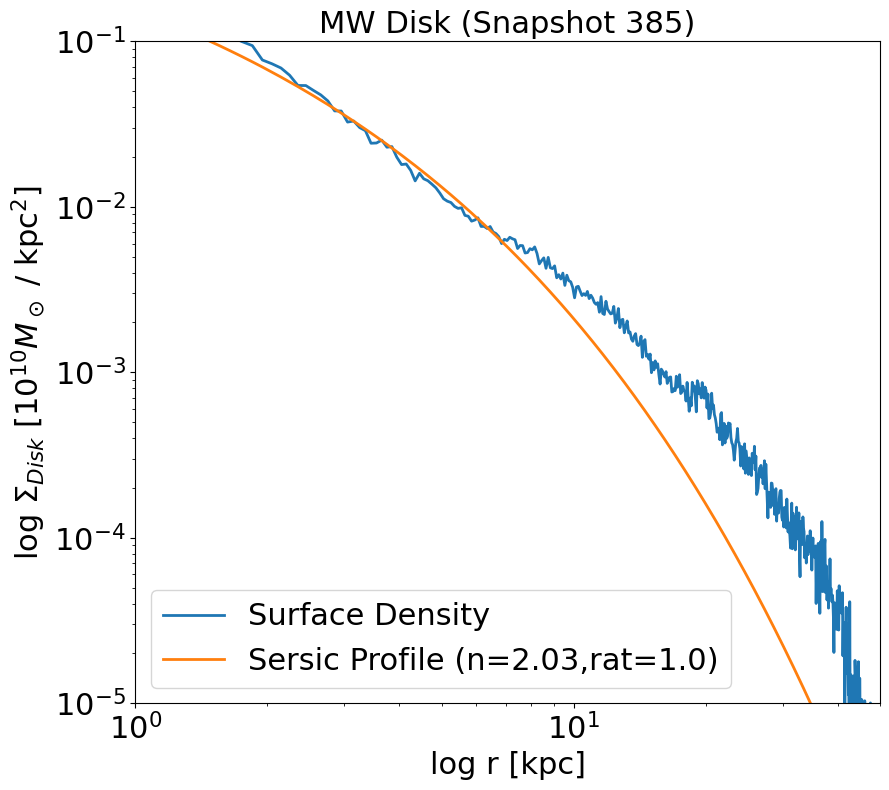

In [161]:
fig, ax = plt.subplots(figsize=(9,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Surface Density Profile
ax.loglog(MWr_annuli385,MWsigmadisk385,lw=2,label="Surface Density")


# Sersic fit to the surface brightness
ax.loglog(MWr_annuli385,MWSersicFunc385(MWr_annuli385,*MWpopt385),lw=2,label="Sersic Profile (n=2.03,rat=1.0)")


plt.xlabel('log r [kpc]', fontsize=22)

# note the y axis units
plt.ylabel(r'log $\Sigma_{Disk}$ [$10^{10} M_\odot$ / kpc$^2$]', 
          fontsize=22)

plt.title('MW Disk (Snapshot 385)', fontsize=22)

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-5,0.1)

ax.legend(loc='best', fontsize=22)
fig.tight_layout()
plt.savefig('SersicMW_385')

In [153]:
def M31SersicFunc385(r,n,rat):
    """Function that computes the Sersic Profile for a disk 
    
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        n:  `float`
            sersic index
        rat: 'float'
            mass to light ratio

    RETURNS
    -------
        func: `array of floats`
            the surface brightness/mass density
            profile for the disk in Lsun/kpc^2

    """
    re = M31re_disk385
    mtot = M31disk_total385
    return ((mtot/rat)/(1e10*7.2*np.pi*re**2))*np.exp(-(2*n-1/3)*((r/re)**(1/n)-1))

In [155]:
M31popt385, M31pcov385 = curve_fit(M31SersicFunc385,M31r_annuli385,M31sigmadisk385,bounds=([0,0.9],[9.0,1.0]))
print(M31popt385)

[2.43349308 0.9       ]


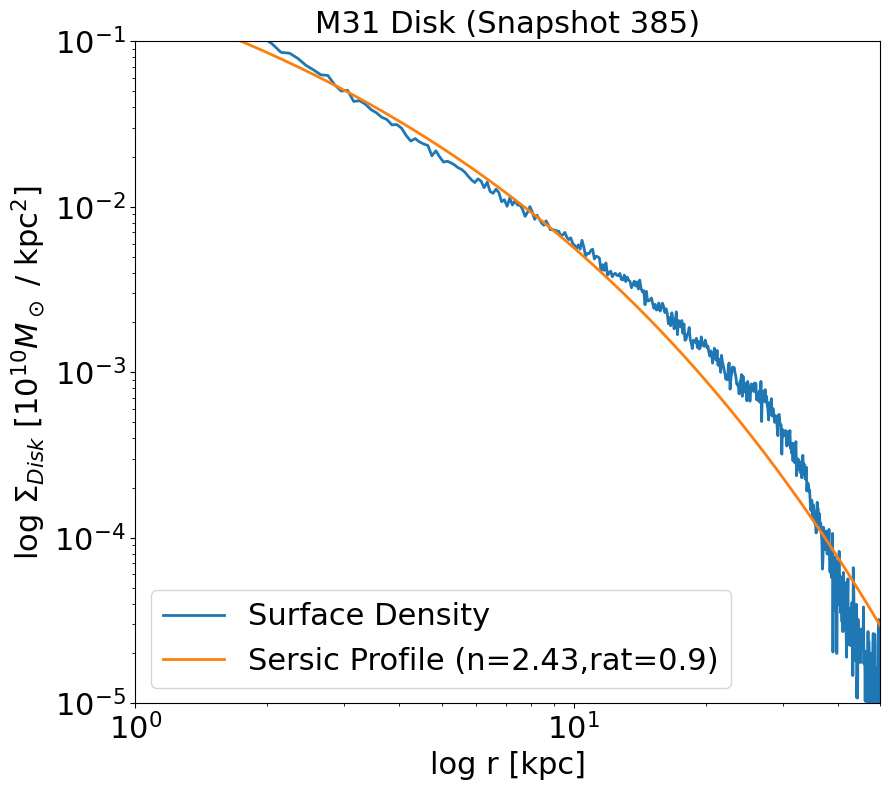

In [159]:
fig, ax = plt.subplots(figsize=(9,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Surface Density Profile
ax.loglog(M31r_annuli385,M31sigmadisk385,lw=2,label="Surface Density")


# Sersic fit to the surface brightness
ax.loglog(M31r_annuli385,M31SersicFunc385(M31r_annuli385,*M31popt385),lw=2,label="Sersic Profile (n=2.43,rat=0.9)")


plt.xlabel('log r [kpc]', fontsize=22)

# note the y axis units
plt.ylabel(r'log $\Sigma_{Disk}$ [$10^{10} M_\odot$ / kpc$^2$]', 
          fontsize=22)

plt.title('M31 Disk (Snapshot 385)', fontsize=22)

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-5,0.1)

ax.legend(loc='best', fontsize=22)
fig.tight_layout()

plt.savefig('SersicM31_385')